In [1]:
import os
import numpy as np

# data processing
import pandas as pd
from sklearn.model_selection import train_test_split

# Graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Image
import skimage.io
import skimage.transform

# Deep learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf


In [2]:
# To be able to reproduce the same results at each runtime, set a random seed
np.random.seed(21)

tf.random.set_seed(21)


In [3]:
training_set = pd.read_csv('sign_mnist_train.csv')

In [4]:
test_set = pd.read_csv('sign_mnist_test.csv')

In [5]:
y = test_set['label']

In [6]:
x_test = test_set.iloc[:, 1:].values
y_test = test_set.iloc[:, 0].values
x_train = training_set.iloc[:, 1:].values
y_train = training_set.iloc[:, 0].values

C:\Users\sachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

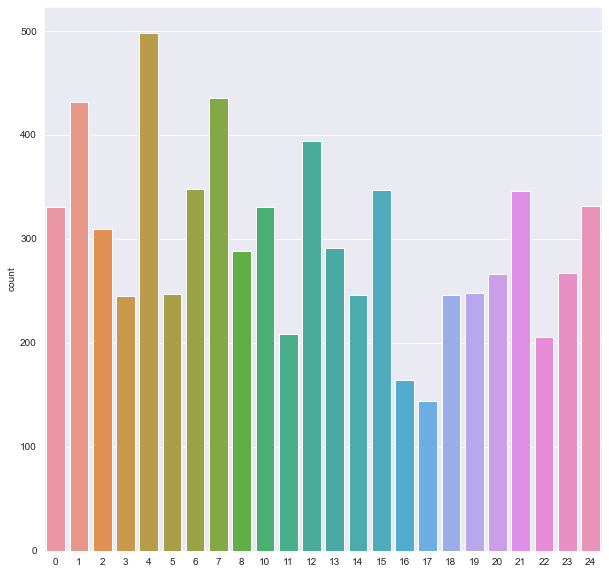

In [7]:
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(y_test)

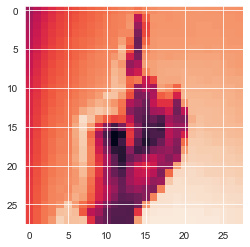

In [8]:
img = np.array(x_train[0, :].reshape(28,28))
plt.imshow(img)

In [9]:
x_train.shape, x_test.shape

((27455, 784), (7172, 784))

In [10]:
x_train = np.reshape(x_train, (27455, 28, 28, 1))/255
x_test = np.reshape(x_test, (7172, 28, 28, 1))/255

In [11]:
x_train, x_test

(array([[[[0.41960784],
          [0.4627451 ],
          [0.49803922],
          ...,
          [0.66666667],
          [0.66666667],
          [0.6627451 ]],
 
         [[0.43529412],
          [0.4745098 ],
          [0.50588235],
          ...,
          [0.67058824],
          [0.67058824],
          [0.66666667]],
 
         [[0.44313725],
          [0.48235294],
          [0.51372549],
          ...,
          [0.67058824],
          [0.67058824],
          [0.67058824]],
 
         ...,
 
         [[0.55686275],
          [0.58823529],
          [0.62352941],
          ...,
          [0.79215686],
          [0.78823529],
          [0.78431373]],
 
         [[0.55686275],
          [0.59215686],
          [0.62745098],
          ...,
          [0.8       ],
          [0.79607843],
          [0.79215686]],
 
         [[0.55686275],
          [0.59215686],
          [0.62745098],
          ...,
          [0.8       ],
          [0.79607843],
          [0.79215686]]],
 
 
        [

In [12]:
# from keras.utils import to_categorical
# y_train = to_categorical(y_train, 24)
# y_test = to_categorical(y_test, 24)

from sklearn.preprocessing import OneHotEncoder
y_train= y_train.reshape(-1,1)
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray()

y_test= y_test.reshape(-1,1)
ohe = OneHotEncoder()
y_test = ohe.fit_transform(y_test).toarray()

In [13]:
from keras.models import Sequential
model = Sequential()

In [14]:
from keras.layers import Conv2D
model.add(Conv2D(128, (3,3), input_shape=(28, 28, 1), activation='relu'))

from keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

from keras.layers import Dropout
model.add(Dropout(0.2))

from keras.layers import Flatten
model.add(Flatten())

from keras.layers import Dense
model.add(Dense(units = 128, activation = 'relu'))


from keras.layers import Dense
model.add(Dense(units = 24, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [15]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
model.fit(x_train, y_train, batch_size=26, epochs=3, validation_data = (x_test, y_test))

Epoch 1/3
1056/1056 [==============================] - 45s 42ms/step - loss: 0.8008 - accuracy: 0.7549 - val_loss: 0.4064 - val_accuracy: 0.8820
Epoch 2/3
1056/1056 [==============================] - 43s 41ms/step - loss: 0.0694 - accuracy: 0.9805 - val_loss: 0.3599 - val_accuracy: 0.8982
Epoch 3/3
1056/1056 [==============================] - 46s 43ms/step - loss: 0.0305 - accuracy: 0.9918 - val_loss: 0.3317 - val_accuracy: 0.9219


In [17]:
y_pred = model.predict(x_test)

225/225 [==============================] - 2s 9ms/step


In [18]:
model.evaluate(x_test, y_test)

225/225 [==============================] - 2s 10ms/step - loss: 0.3317 - accuracy: 0.9219


[0.33165955543518066, 0.9219185709953308]

In [19]:
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_test_ = np.argmax(y_test, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_, y_pred)

<AxesSubplot:>

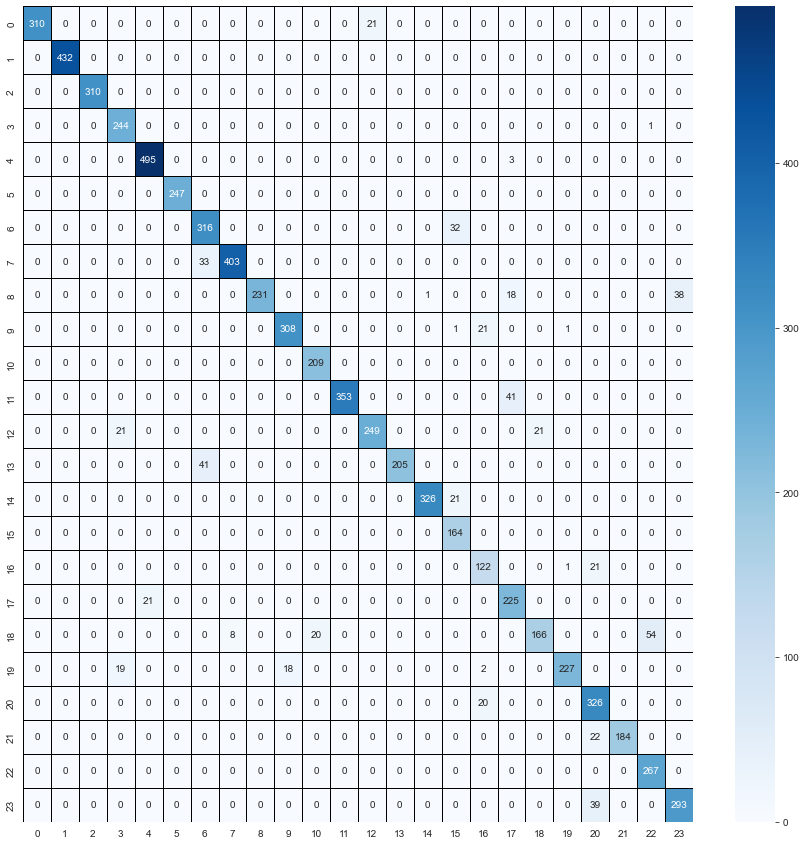

In [22]:
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

In [23]:
test_data_path = "C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters"

In [24]:
classes_embeddings = {'a': 0,
                      'b': 1,
                      'c': 2,
                      'e': 3,
                      'n': 4
                      }
# Extract the category names from the dictionary
classes = []

for key in classes_embeddings.keys():
    classes.append(key)

n_classes = len(classes)
print(n_classes)
print(classes)

5
['a', 'b', 'c', 'e', 'n']


In [25]:
class_path = [None] * 5

i=0

for cat in classes:
    path = os.path.join(test_data_path, cat)
    class_path[i] = path
    i+=1
print(class_path)

['C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters\\a', 'C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters\\b', 'C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters\\c', 'C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters\\e', 'C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters\\n']


[1, 1, 1, 1, 1]


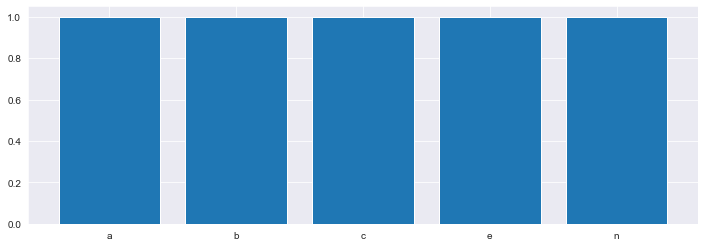

In [26]:
images_count_per_class = []

for cat in classes:
    #listdir:we can print a list of names of all the files present in the specified path.
    files = os.listdir(os.path.join(test_data_path, cat))
    #shows the number of files in each class directory
    images_count_per_class += [len(files)]
print(images_count_per_class)

plt.figure(figsize = (12,4))
plt.bar([_ for _ in range(n_classes)], images_count_per_class, tick_label=classes)
plt.show()

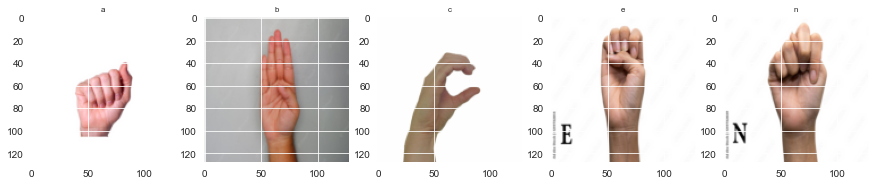

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=n_classes, figsize=(15, 3))

class_caption=0

for i in range(5):
    # Grabs a random image instead of just the first one in the folder
    rand = np.random.randint(0,images_count_per_class[i]) 
    #select the name of the image at location "rand" in the files list
    #i is the class number(1-5)
    img_name = os.listdir(class_path[i])[rand]
    #read the image from given directory
    img = skimage.io.imread(os.path.join(class_path[i], img_name))
    #resizing the images to a smaller version to reduce computation complexity
    #128, 128, 3 are the width,height and number of channels in the image
    img = skimage.transform.resize(img, (128,128,3), mode='reflect') 
    axes[class_caption].imshow(img, resample=True)
    axes[class_caption].set_title(classes[i], fontsize=8)
    class_caption += 1

plt.show()

In [28]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255,)

In [29]:
# test_set2 = test_datagen.flow_from_directory("C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters",
#                                             target_size = (28, 28),
#                                             color_mode = 'grayscale',
#                                             batch_size = 32,
#                                             class_mode = 'categorical',
#                                             shuffle = False)

In [30]:
test_set2 = tf.keras.utils.image_dataset_from_directory(
    directory = 'C:/Users/sachi/OneDrive/Documents/RoboGarden/Neural Networks/ART/sign_letters',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28, 28),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 5 files belonging to 5 classes.


In [31]:
test_set2

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [32]:
y_test2 = y_test[:5, :]

In [33]:
# import tensorflow as tf
# test_set2 = tf.keras.utils.img_to_array(
#     img, data_format=None, dtype=None
# )

In [34]:
y_pred2 = model.predict(test_set2)
print(y_pred2)
y_test2

1/1 [==============================] - 0s 69ms/step
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [35]:
y_pred2.shape

(5, 24)

In [36]:
y_pred2 = tf.expand_dims(y_pred2, axis = 0)


In [37]:
y_pred2.shape

TensorShape([1, 5, 24])

In [39]:
y_test2.shape

(5, 24)

In [40]:
y_test2.dtype

dtype('float64')

In [41]:
y_test2 = tf.expand_dims(y_test2, axis = 0)

In [42]:
y_test2.shape

TensorShape([1, 5, 24])

Could not get the evaluate to work for this part of the project.

In [ ]:
#model.evaluate(test_set2, y_test2)

In [ ]:
# from keras.layers import Conv2D
# from keras.layers import MaxPooling2D
# from keras.layers import Flatten
# from keras.layers import Dense
# from keras.layers import Dropout

# from keras.models import Sequential
# sl_model = Sequential()

# # Convolution Layer
# sl_model.add(Conv2D(128, (3, 3), input_shape = (28, 28, 1), activation = 'relu')) # shape matches the image size we loaded

# # Pooling Layer
# sl_model.add(MaxPooling2D(pool_size = (2, 2)))

# # Add a dropout layer
# sl_model.add(Dropout(0.2))

# # Adding a second convolutional layer
# sl_model.add(Conv2D(64, (3, 3), activation = 'relu'))
# sl_model.add(MaxPooling2D(pool_size = (2, 2)))

# # Flattening layer
# sl_model.add(Flatten())

# # Fully connected dense layer
# sl_model.add(Dense(units = 128, activation = 'relu'))

# # Output layer (one node for binary models, use softmax for multi-class models)
# sl_model.add(Dense(units = 24, activation = 'softmax'))

In [ ]:
# sl_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# sl_model.summary()

In [ ]:
#sl_model.fit(x_train, y_train, batch_size=26, validation_split = 0.1, epochs=10)